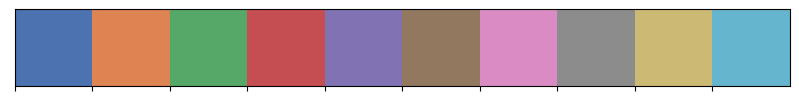

In [1]:
%matplotlib inline

import lsqfit
from improved_model_averaging import *
from improved_model_averaging.test_tmin import test_vary_tmin_SE

from improved_model_averaging.stats import model_avg

In [2]:
p0_test_ME = {
    'A0': 5.0,
    'E0': 1.0,
    'A1': 2.0,
    'E1': 1.5,
}
Nt = 32

def ME_model(x,p):
    return multi_exp_model_lsqfit(x,p,Nexc=2)

# noise_params for Figures 3 and 5A
# noise_params = {
#     'frac_noise_amp': 0.3,
#     'noise_floor_amp': 0.0,
#     'noise_samples': 30,
# }

## noise_params for Figures 4 and 5B
noise_params = {
    'frac_noise_amp': 3E-3,
    'noise_floor_amp': 1E-5,
    'noise_samples': 200,
}

obs_name='E0'

correlated_data = True
rho = 0.6

In [3]:
# Set seed for consistency of outcome
np.random.seed(77700)  # Fig 3A or 4A
# np.random.seed(81890)  # Fig 3B or 4B
# np.random.seed(87414)  # Fig 3C or 4C
# np.random.seed(92787)  # Fig 3D or 4D

if correlated_data:
    test_data = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)
else:
    test_data = gen_synth_data(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        **noise_params)

In [4]:
np.exp(-2)

0.1353352832366127

In [4]:
import tqdm

tmax = test_data['t'][-1]
max_tmin = tmax - 20
priors_SE = {"A0": gv.gvar("5(1)"), "A1" : gv.gvar("2(1)"), "E0": gv.gvar("1.0(0.3)"), "log(dE)": gv.gvar("0(0.3)")}
#priors_SE = {"A0": gv.gvar("0(10)"), "E0": gv.gvar("1(0.4)")}
IC_list = ['BAIC', 'BPIC', 'PPIC']
p0 = gv.mean(priors_SE)

results = {}
for width in tqdm.tqdm(np.linspace(0.1, 2, 40)):
    priors_SE['log(dE)'] = gv.gvar(priors_SE['log(dE)'].mean, width)
    #print(priors_SE)
    
    
    results[width] = test_vary_tmin_SE(test_data, Nt=Nt, tmax=tmax, max_tmin=max_tmin, obs_name=obs_name,
                                priors_SE=priors_SE, full_BC=False,
                                IC_list=IC_list, data_snr_min=0.0,
                                double_exp_fit=True)


#for IC in IC_list:
#    print(IC + f": E_0 = {test_res['obs_avg_IC'][IC]}")

100%|██████████| 40/40 [00:32<00:00,  1.25it/s]


In [12]:
test = gv.BufferDict()
test['log(a)'] = gv.gvar('0(2)')
test['a']

1.0(2.0)

In [5]:
'''t = 4

for w in results:
    print(w)
    print(results[w]['fits'][t])
'''

"t = 4\n\nfor w in results:\n    print(w)\n    print(results[w]['fits'][t])\n"

--------------------------------
t = 2
logGBF arg min: 13
Least Square Fit:
  chi2/dof [dof] = 0.6 [29]    Q = 0.96    logGBF = 342.4

Parameters:
             A0     4.969 (29)      [  5.0 (1.0) ]  
             A1     2.000 (26)      [  2.0 (1.0) ]  
             E0   0.99932 (61)      [  1.00 (30) ]  
        log(dE)    -0.726 (33)      [  0.00 (73) ]  
--------------------------------------------------
             dE     0.484 (16)      [  1.00 (73) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14*,1e-14,1e-14)    (itns/time = 14/0.0)
  fitter = scipy_least_squares    method = trf



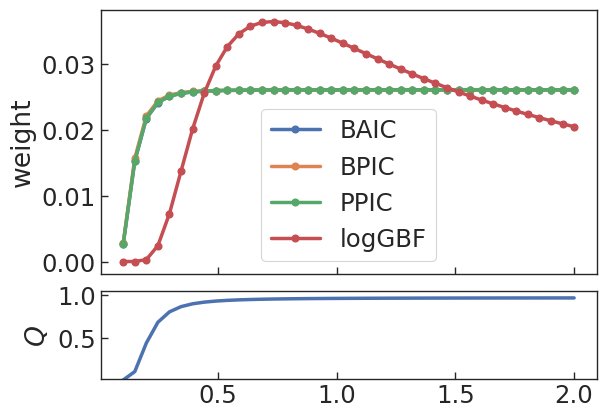

--------------------------------
t = 3
logGBF arg min: 14
Least Square Fit:
  chi2/dof [dof] = 0.61 [28]    Q = 0.95    logGBF = 335.18

Parameters:
             A0    4.948 (60)     [  5.0 (1.0) ]  
             A1     1.95 (11)     [  2.0 (1.0) ]  
             E0   0.9989 (12)     [  1.00 (30) ]  
        log(dE)   -0.761 (90)     [  0.00 (78) ]  
------------------------------------------------
             dE    0.467 (42)     [  1.00 (78) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14*,1e-14,1e-14)    (itns/time = 19/0.0)
  fitter = scipy_least_squares    method = trf



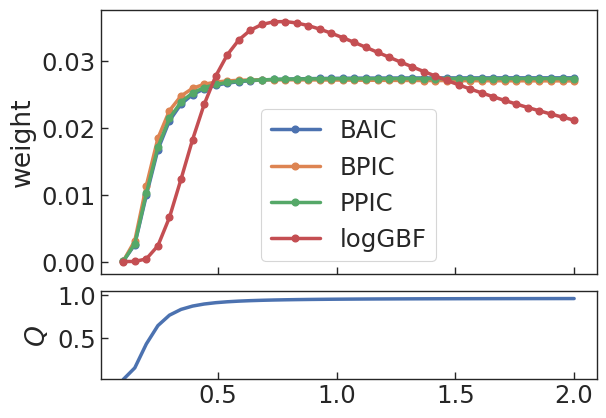

--------------------------------
t = 4
logGBF arg min: 15
Least Square Fit:
  chi2/dof [dof] = 0.63 [27]    Q = 0.93    logGBF = 327.14

Parameters:
             A0     4.93 (11)     [  5.0 (1.0) ]  
             A1     1.90 (38)     [  2.0 (1.0) ]  
             E0   0.9987 (21)     [  1.00 (30) ]  
        log(dE)    -0.79 (22)     [  0.00 (83) ]  
------------------------------------------------
             dE     0.45 (10)     [  1.00 (83) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14,1e-14,1e-14*)    (itns/time = 22/0.0)
  fitter = scipy_least_squares    method = trf



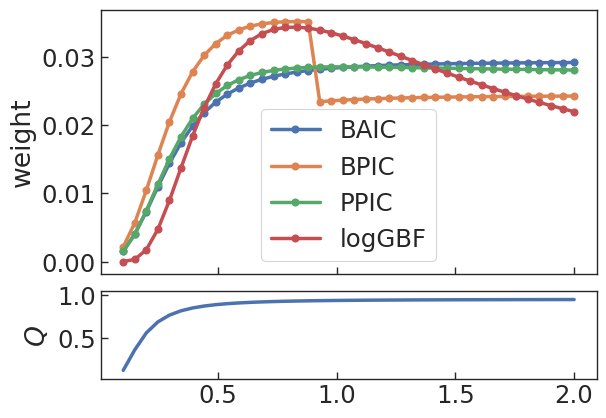

--------------------------------
t = 5
logGBF arg min: 16
Least Square Fit:
  chi2/dof [dof] = 0.64 [26]    Q = 0.92    logGBF = 317.95

Parameters:
             A0     4.95 (11)     [  5.0 (1.0) ]  
             A1     2.11 (89)     [  2.0 (1.0) ]  
             E0   0.9989 (20)     [  1.00 (30) ]  
        log(dE)    -0.73 (28)     [  0.00 (88) ]  
------------------------------------------------
             dE     0.48 (14)     [  1.00 (88) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14,1e-14,1e-14*)    (itns/time = 25/0.0)
  fitter = scipy_least_squares    method = trf



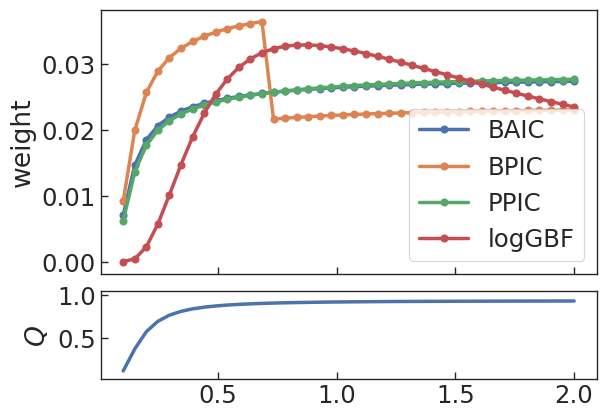

--------------------------------
t = 6
logGBF arg min: 15
Least Square Fit:
  chi2/dof [dof] = 0.67 [25]    Q = 0.89    logGBF = 308.01

Parameters:
             A0     4.93 (16)     [  5.0 (1.0) ]  
             A1     2.22 (96)     [  2.0 (1.0) ]  
             E0   0.9984 (30)     [  1.00 (30) ]  
        log(dE)    -0.74 (29)     [  0.00 (83) ]  
------------------------------------------------
             dE     0.47 (14)     [  1.00 (83) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14*,1e-14,1e-14)    (itns/time = 43/0.0)
  fitter = scipy_least_squares    method = trf



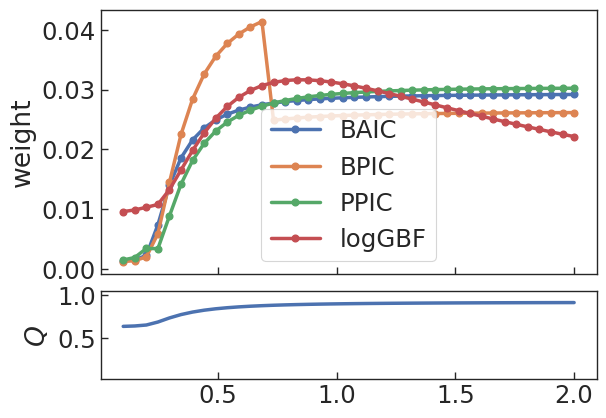

--------------------------------
t = 7
logGBF arg min: 8
Least Square Fit:
  chi2/dof [dof] = 0.72 [24]    Q = 0.84    logGBF = 297.99

Parameters:
             A0     5.103 (42)      [  5.0 (1.0) ]  
             A1      2.0 (1.0)      [  2.0 (1.0) ]  
             E0   1.00166 (96)      [  1.00 (30) ]  
        log(dE)     -0.08 (49)      [  0.00 (49) ]  
--------------------------------------------------
             dE      0.92 (45)      [  1.00 (49) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14,1e-14,1e-14*)    (itns/time = 17/0.0)
  fitter = scipy_least_squares    method = trf



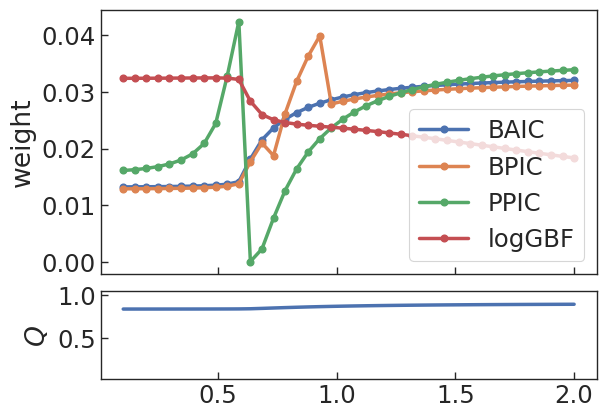

--------------------------------
t = 8
logGBF arg min: 0
Least Square Fit:
  chi2/dof [dof] = 0.63 [23]    Q = 0.91    logGBF = 287.99

Parameters:
             A0       4.95 (10)      [  5.0 (1.0) ]  
             A1       2.0 (1.0)      [  2.0 (1.0) ]  
             E0     0.9984 (22)      [  1.00 (30) ]  
        log(dE)   0.0002 (1000)      [  0.00 (10) ]  
---------------------------------------------------
             dE       1.00 (10)      [  1.00 (10) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14,1e-14,1e-14*)    (itns/time = 5/0.0)
  fitter = scipy_least_squares    method = trf



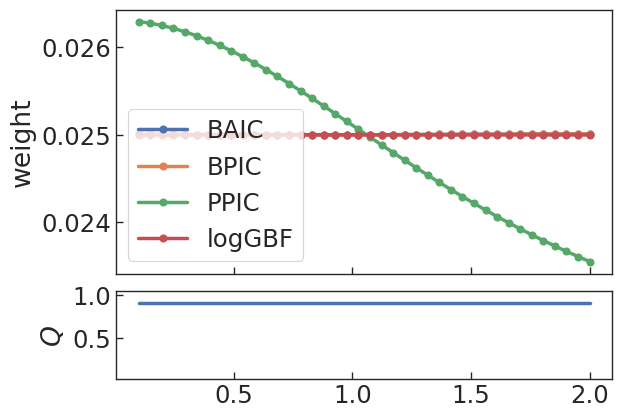

--------------------------------
t = 9
logGBF arg min: 0
Least Square Fit:
  chi2/dof [dof] = 0.63 [22]    Q = 0.9    logGBF = 276.89

Parameters:
             A0       5.15 (31)      [  5.0 (1.0) ]  
             A1       2.0 (1.0)      [  2.0 (1.0) ]  
             E0     1.0022 (59)      [  1.00 (30) ]  
        log(dE)   -4e-06 +- 0.1      [  0.00 (10) ]  
---------------------------------------------------
             dE       1.00 (10)      [  1.00 (10) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14,1e-14,1e-14*)    (itns/time = 5/0.0)
  fitter = scipy_least_squares    method = trf



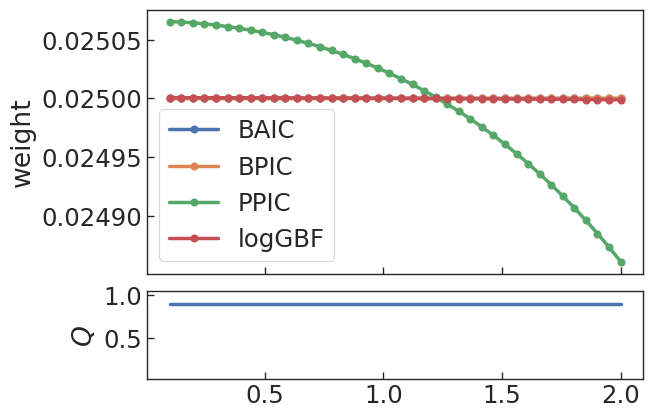

In [5]:
for t in range(2, 10):

    fig, (ax_weight, ax_Q) = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1], 'hspace':0.1}, sharex=True)
    print('--------------------------------')
    print('t = %s'%(str(t)))
    for ic in (IC_list + ['logGBF']):  
        convert_to_weight = lambda x, xmin : np.exp(-(x-xmin)/2)
        
        if ic == 'logGBF':
            ic_values = [-2 *results[w]['fits'][t].logGBF for w in results]
            print('logGBF arg min:', np.argmin(ic_values))
            print(results[list(results)[np.argmin(ic_values)]]['fits'][t])
        else:
            ic_values = [results[w]['IC'][ic][t] for w in results]

        #print(ic)
        #print(ic_values)

        ic_min = np.min(ic_values)
        weights = convert_to_weight(ic_values, ic_min)
        weights = weights / np.sum(weights) # normalize

        x = list(results)
        ax_weight.plot(x, weights, label=ic, marker='o')

    ax_Q.plot(x, [results[w]['fits'][t].Q for w in results])
    ax_Q.set_ylabel('$Q$')
    ax_Q.set_ylim(0.01, 1.05)
    ax_weight.set_ylabel('weight')

    ax_weight.legend()
    plt.show()


In [ ]:
gv.

In [12]:
print(results[list(results)[18]]['fits'][3])

Least Square Fit:
  chi2/dof [dof] = 2.9 [28]    Q = 6.8e-07    logGBF = 304.66

Parameters:
             A0     5.005 (48)      [  5.0 (1.0) ]  
             A1      2.10 (15)      [ 10.0 (1.0) ]  *****
             E0   1.00003 (98)      [  1.00 (30) ]  
        log(dE)    -0.663 (83)      [ -0.69 (30) ]  
--------------------------------------------------
             dE     0.515 (43)      [  0.50 (15) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-14*,1e-14,1e-14)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



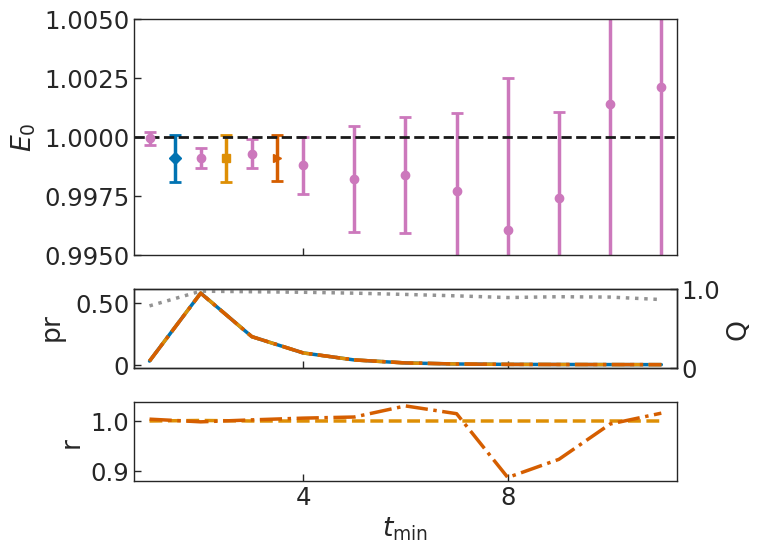

In [6]:
## Figure 3 or 4

# plot_MA_result(test_res, IC_list=IC_list, is_linear=False, target_value=p0_test_ME[obs_name],
#                show_IC_ratios=False, indv_plot_key='indv', ylim=[0.788,0.812])  # Fig 3
plot_MA_result(results[list(results)[18]], IC_list=IC_list, is_linear=False, target_value=p0_test_ME[obs_name],
               show_IC_ratios=True, indv_plot_key='indv', ylim=(0.995, 1.005))  # Fig 4

## Uncomment to save figure to disk
# plt.savefig('plots/exp/fixed_N_no_floor_1.pdf', bbox_inches = "tight")  # Fig 3A
# plt.savefig('plots/exp/fixed_N_no_floor_2.pdf', bbox_inches = "tight")  # Fig 3B
# plt.savefig('plots/exp/fixed_N_no_floor_3.pdf', bbox_inches = "tight")  # Fig 3C
# plt.savefig('plots/exp/fixed_N_no_floor_4.pdf', bbox_inches = "tight")  # Fig 3D
# plt.savefig('plots/exp/fixed_N_floor_1.pdf', bbox_inches = "tight")  # Fig 4A
# plt.savefig('plots/exp/fixed_N_floor_2.pdf', bbox_inches = "tight")  # Fig 4B
# plt.savefig('plots/exp/fixed_N_floor_3.pdf', bbox_inches = "tight")  # Fig 4C
# plt.savefig('plots/exp/fixed_N_floor_4.pdf', bbox_inches = "tight")  # Fig 4D

In [6]:
## Scaling w/ number of samples

Nsamp_array = np.array([40, 80, 160, 320, 640, 1280])
Nsamp_max = Nsamp_array[-1]

np.random.seed(77700)  # Fig 5A and 5B

noise_params['noise_samples'] = Nsamp_max
if correlated_data:
    scale_data = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)    
else:
    scale_data = gen_synth_data(
        np.arange(0,Nt),                              
        p0_test_ME, 
        ME_model,
        **noise_params)
    
IC_list = ['BAIC', 'BPIC', 'PPIC']
fixed_list = []
fixed_tmin = {}

obs_est_vs_Nsamp={}
for est in IC_list + fixed_list:
    obs_est_vs_Nsamp.update({est: []})


for Nsamp in Nsamp_array:
    test_data_scale = cut_synth_data_Nsamp(scale_data, Nsamp)
    test_res_scale = test_vary_tmin_SE(test_data_scale, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name,
                                       priors_SE={"A0": gv.gvar("0(10)"),"E0": gv.gvar("1(1)")},
                                       IC_list=IC_list)
    
    for IC in IC_list:
        obs_est_vs_Nsamp[IC].append(test_res_scale['obs_avg_IC'][IC])
    for fixed in fixed_list:
        obs_est_vs_Nsamp[fixed].append(test_res_scale['obs'][fixed_tmin[fixed]])

<AxesSubplot:xlabel='$\\log(N)$', ylabel='$E_0$'>

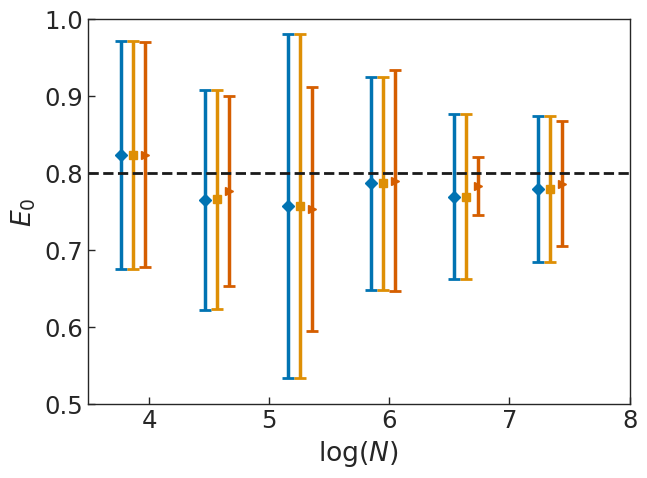

In [7]:
## Figure 5A or 5B

# plot_MA_result_scaling(obs_est_vs_Nsamp, Nsamp_array, IC_list=IC_list, is_linear=False,
#                        fixed_list=fixed_list, target_value=p0_test_ME[obs_name], indv_plot_key='indv',
#                        ylim=[0.788,0.812])  # Fig 5A
plot_MA_result_scaling(obs_est_vs_Nsamp, Nsamp_array, IC_list=IC_list, is_linear=False,
                       fixed_list=fixed_list, target_value=p0_test_ME[obs_name], indv_plot_key='indv',
                       ylim=[0.5,1.0])  # Fig 5B

# Uncomment to save figure to disk
# plt.savefig('plots/exp/N_scaling_no_floor.pdf', bbox_inches = "tight")  # Fig 5A
# plt.savefig('plots/exp/N_scaling_floor.pdf', bbox_inches = "tight")  # Fig 5B

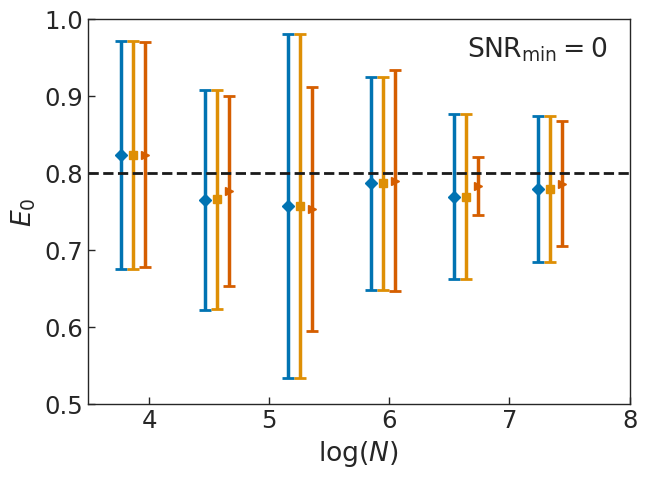

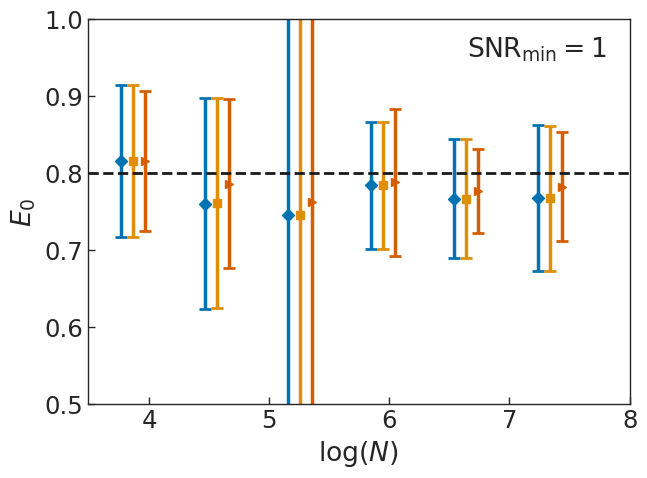

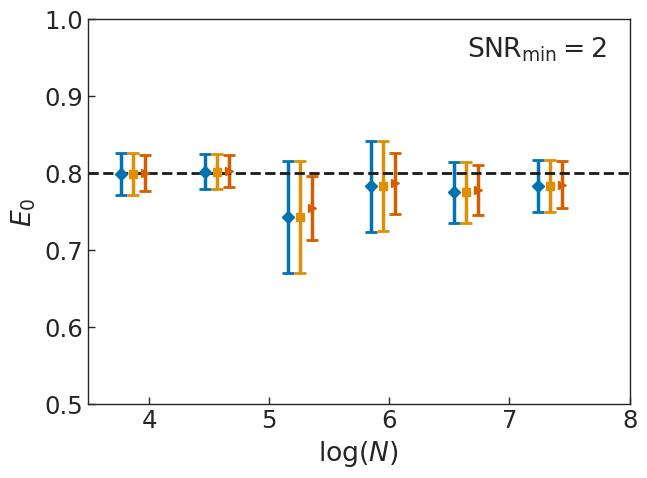

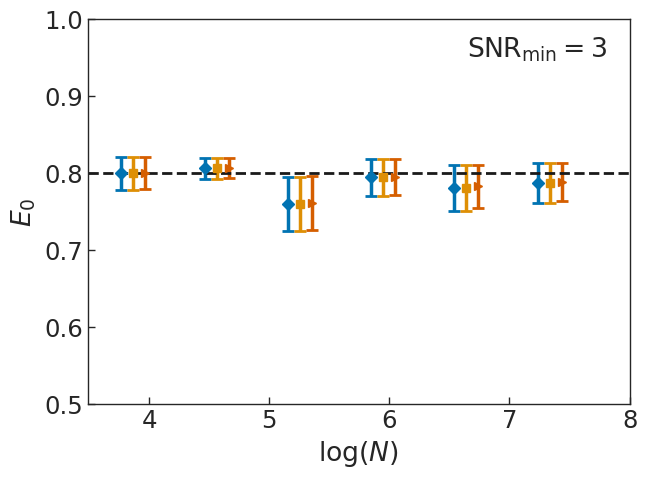

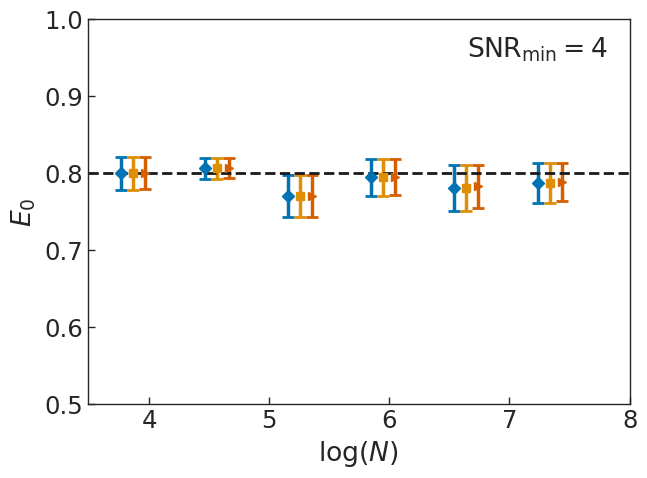

In [8]:
## Scaling w/ number of samples for different signal-to noise ratios

snr_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])

IC_list = ['BAIC', 'BPIC', 'PPIC']
fixed_list = []
fixed_tmin = {}

for snr in snr_array:
    Nsamp_array = np.array([40, 80, 160, 320, 640, 1280])
    Nsamp_max = Nsamp_array[-1]

    np.random.seed(77700)  # Fig 6

    noise_params['noise_samples'] = Nsamp_max
    if correlated_data:
        snr_data = gen_synth_data_corr(
            np.arange(0,Nt), 
            p0_test_ME, 
            ME_model,
            rho=rho,
            **noise_params)    
    else:
        snr_data = gen_synth_data(
            np.arange(0,Nt), 
            p0_test_ME, 
            ME_model,
            **noise_params)

    obs_est_vs_Nsamp={}
    for est in IC_list + fixed_list:
        obs_est_vs_Nsamp.update({est: []})


    for Nsamp in Nsamp_array:
        test_data_snr = cut_synth_data_Nsamp(snr_data, Nsamp)
        test_res_snr = test_vary_tmin_SE(test_data_snr, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name,
                                         priors_SE={"A0": gv.gvar("0(10)"),"E0": gv.gvar("1(1)")},
                                         IC_list=IC_list, data_snr_min=snr)

        for IC in IC_list:
            obs_est_vs_Nsamp[IC].append(test_res_snr['obs_avg_IC'][IC])
        for fixed in fixed_list:
            obs_est_vs_Nsamp[fixed].append(test_res_snr['obs'][fixed_tmin[fixed]])


    ## Figure 6

    ax = plot_MA_result_scaling(obs_est_vs_Nsamp, Nsamp_array, IC_list=IC_list, is_linear=False, fixed_list=fixed_list, target_value=p0_test_ME[obs_name], indv_plot_key='indv', ylim=[0.5,1.0])
    plt.text(0.7, 0.9, r'${\rm SNR}_{\rm min} = $' + str(int(snr)), transform=ax.transAxes)
#     plt.show()
    
    ## Uncomment to save figure to disk
#     plt.savefig('plots/exp/N_scaling_SNR_'+str(int(snr))+'.pdf', bbox_inches = "tight")  # Fig 6

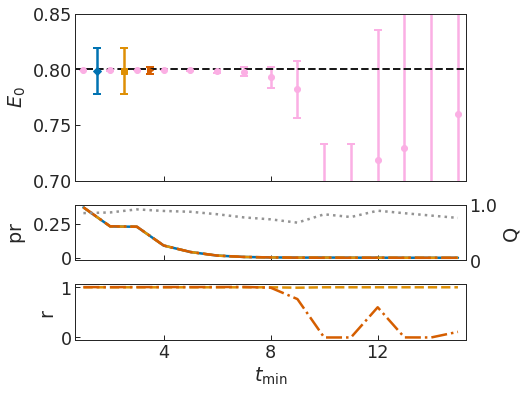

In [10]:
## Scaling w/ number of samples w/ two-state fit

Nsamp_array = np.array([40, 80, 160, 320, 640, 1280])
Nsamp_max = Nsamp_array[-1]

np.random.seed(77700)  # Fig 7 and 8

noise_params['noise_samples'] = Nsamp_max
noise_params['noise_floor_amp'] = 1E-5
if correlated_data:
    scale_data_2state = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)    
else:
    scale_data_2state = gen_synth_data(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        **noise_params)

double_exp_fit = True

if double_exp_fit:
    priors_SE={"A0": gv.gvar("0(10)"),
           "E0": gv.gvar("1.5(1.0)"),
           'A1': gv.gvar("0(100)"),
           'ldE1': gv.gvar("-1(3)"),
          }
else:    
    priors_SE={"A0": gv.gvar("0(10)"),
               "E0": gv.gvar("0.8(1.0)"),
              }
    
IC_list = ['BAIC', 'BPIC', 'PPIC']
fixed_list = []
fixed_tmin = {}

obs_est_vs_Nsamp={}
for est in IC_list + fixed_list:
    obs_est_vs_Nsamp.update({est: []})


for Nsamp in Nsamp_array:
    test_data_scale_2state = cut_synth_data_Nsamp(scale_data_2state, Nsamp)
    test_res_scale_2state = test_vary_tmin_SE(test_data_scale_2state, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name,
                                              IC_list=IC_list, data_snr_min=4.0, double_exp_fit=double_exp_fit,
                                              priors_SE=priors_SE)
    
    for IC in IC_list:
        obs_est_vs_Nsamp[IC].append(test_res_scale_2state['obs_avg_IC'][IC])
    for fixed in fixed_list:
        obs_est_vs_Nsamp[fixed].append(test_res_scale_2state['obs'][fixed_tmin[fixed]])

        
    ## Figure 7
    if Nsamp==640:
        plot_MA_result(test_res_scale_2state, IC_list=IC_list, is_linear=False, target_value=p0_test_ME[obs_name],
                       show_IC_ratios=True, indv_plot_key='indv_2state', ylim=[0.7,0.85])

        ## Uncomment to save figure to disk
#         plt.savefig('plots/exp/fixed_N_2state_'+str(int(Nsamp))+'.pdf', bbox_inches = "tight")  # Fig 7

Text(0.5, 0.9, '2-state, ${\\rm SNR}_{\\rm min} = $4')

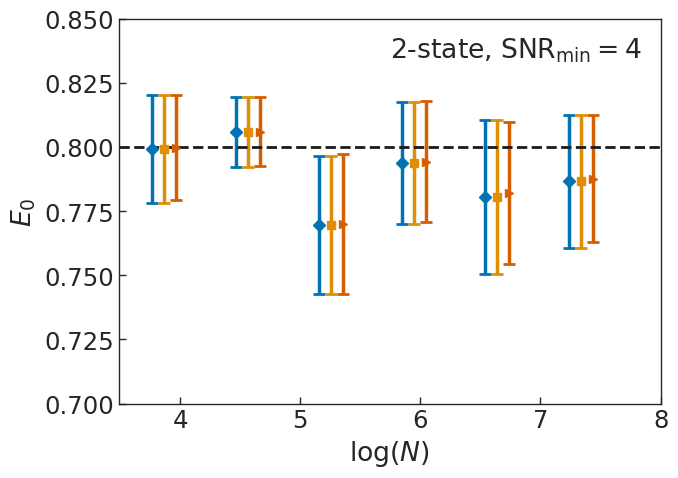

In [9]:
## Figure 8

ax = plot_MA_result_scaling(obs_est_vs_Nsamp, Nsamp_array, IC_list=IC_list, is_linear=False, fixed_list=fixed_list, target_value=p0_test_ME[obs_name], indv_plot_key='indv_2state', ylim=[0.7,0.85])
plt.text(0.5, 0.9, r'2-state, ${\rm SNR}_{\rm min} = $' + str(int(snr)), transform=ax.transAxes)

# Uncomment to save figure to disk
# plt.savefig('plots/exp/N_scaling_2state.pdf', bbox_inches = "tight")

In [10]:
## Scaling w/ number of samples - grand average

Nsamp_array = np.array([40, 80, 160, 320, 640, 1280])
Nsamp_max = Nsamp_array[-1]

# np.random.seed(93897)  # Fig 9
np.random.seed(77700)

noise_params['noise_samples'] = Nsamp_max
if correlated_data:
    scale_data = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)    
else:
    scale_data = gen_synth_data(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        **noise_params)

priors_SE_1state={"A0": gv.gvar("0(10)"),
                  "E0": gv.gvar("0.8(1)")}
priors_SE_2state={"A0": gv.gvar("0(10)"),
                  "E0": gv.gvar("0.8(1)"),
                  'A1': gv.gvar("3(100000)e-4"),
                  'ldE1': gv.gvar("-1(3)")}
    
IC_list = ['BAIC', 'BPIC', 'PPIC']
fixed_list = []
fixed_tmin = {}

obs_est_vs_Nsamp_ga={}
for est in IC_list + fixed_list:
    obs_est_vs_Nsamp_ga.update({est: []})

for Nsamp in Nsamp_array:
    test_data_scale = cut_synth_data_Nsamp(scale_data, Nsamp)
    test_res_scale_1state = test_vary_tmin_SE(test_data_scale, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name,
                                              IC_list=IC_list, data_snr_min=4.0, double_exp_fit=False,
                                              priors_SE=priors_SE_1state)
    test_res_scale_2state = test_vary_tmin_SE(test_data_scale, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name,
                                              IC_list=IC_list, data_snr_min=4.0, double_exp_fit=True,
                                              priors_SE=priors_SE_2state)
    
    for IC in IC_list:
        ICs = np.concatenate((test_res_scale_1state['IC'][IC],test_res_scale_2state['IC'][IC]),axis=None)
        probs = np.exp(-(ICs-np.amin(ICs))/2)
        obs = np.concatenate((test_res_scale_1state['obs'],test_res_scale_2state['obs']),axis=None)
        
        obs_est_vs_Nsamp_ga[IC].append(model_avg(obs, probs))

Text(0.45, 0.9, 'Grand avg, ${\\rm SNR}_{\\rm min} = $4')

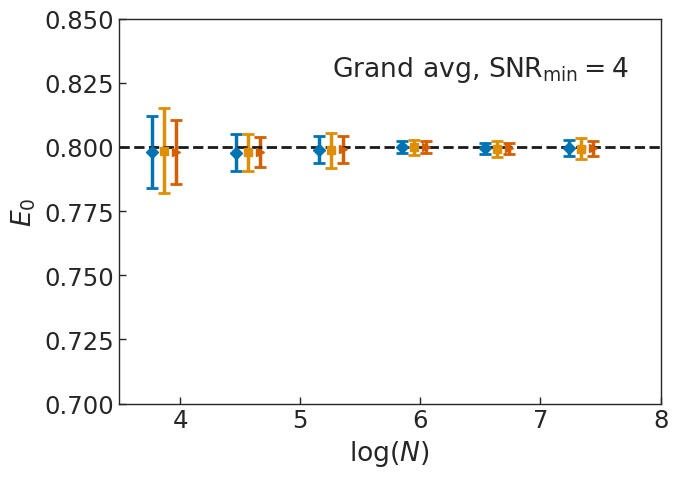

In [11]:
## Figure 9

plot_MA_result_scaling(obs_est_vs_Nsamp_ga, Nsamp_array, IC_list=IC_list, fixed_list=fixed_list, is_linear=False, target_value=p0_test_ME[obs_name], ylim=[0.7,0.85])
plt.text(0.45, 0.9, r'Grand avg, ${\rm SNR}_{\rm min} = $' + str(int(snr)), transform=ax.transAxes)

# Uncomment to save figure to disk
# plt.savefig('plots/exp/N_scaling_ga.pdf', bbox_inches = "tight")